# 图片分类模块MMClassification快速入门

## 1.简介

`MMClassification模块`主要功能是对图片进行分类，内置了常见的图片分类网络模型，有`LeNet`、`MobilNet`和`ResNet50`，并提供了预训练模型。

## 2.导入基础库

In [1]:
from base import *
from MMEdu import MMClassification as cls

No CUDA runtime is found, using CUDA_HOME='C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.2'


## 3.模型推理

我们提供了常见模型的预训练模型，借助预训练模型就能体验AI的推理过程。

#### 第一步：实例化模型

`MMClassification`推荐的网络模型是`LeNet`，这是一个著名的轻量级卷积神经网络模型。


In [2]:
model = cls('LeNet')

#### 第二步：指定模型保存的路径

训练好的模型包含两个文件，一个是权重文件，扩展名是.pth，另一个是分类标签信息文件，用来指定训练集的路径，代表训练集中所包含的所有类别，扩展名是.txt。

In [3]:
checkpoint = '../checkpoints/cls_model/hand_gray/latest.pth'
class_path = '../dataset/cls/hand_gray/classes.txt'

#### 第三步：指定图片，开始推理

我们提供的`LeNet`预训练模型是基于经典的“剪刀石头布”数据集训练的，你可以找几张剪刀石头布的手势的图片，让AI“识别”一下。
`show`代表是否需要显示结果图片，设置为`True`表示推理后显示推理结果图。

在进行`inference`推理之后我们可以使用`model.print_result()`函数进行输出，通常来说我们会在输出结果里阐述各个数据代表的意义，同时也会将输出内容进行中文化处理，方便更多的受众群体能够理解人工智能推理所带来的结果数据。

========= begin inference ==========
load checkpoint from local path: ../checkpoints/cls_model/hand_gray/latest.pth
========= finish inference ==========
检测结果如下：
[{'标签': 1, '置信度': 0.6409855484962463, '预测结果': 'rock'}]


[{'标签': 1, '置信度': 0.6409855484962463, '预测结果': 'rock'}]

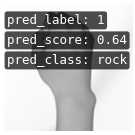

In [4]:
img = 'testrock01-02.png'
result = model.inference(image=img, show=True, class_path=class_path,checkpoint = checkpoint)
model.print_result(result)

同时您会发现当前目录下出现了一个新的文件夹“cls_result”，里面放着这张图片的推理结果图，名称为原本的图片文件名称，下次推理的结果图也会放到这个文件夹。可以得到这个文件夹下查看。

返回的数据类型是一个字典列表（很多个字典组成的列表）类型的变量，内置的字典表示分类的结果，如“`{'标签': 1, '置信度': 0.6409855484962463, '预测结果': 'rock'}`”，我们可以用字典访问其中的元素。

In [5]:
x = model.print_result(result)
print('标签（序号）为：',x[0]['标签'])
classes=['布','石头','剪刀']
print('识别结果为：',classes[x[0]['标签']])

检测结果如下：
[{'标签': 1, '置信度': 0.6409855484962463, '预测结果': 'rock'}]
标签（序号）为： 1
识别结果为： 石头


#### 第四步：指定一组图片，开始推理
您也可以将收集的图片放在一个文件夹下，然后指定文件夹路径进行一组图片的批量推理。如在demo文件夹下新建一个cls_testIMG文件夹放图片，运行下面这段代码。

In [13]:
img = '../dataset/cls/hand_gray/val_set/paper/'
model = cls('LeNet')
checkpoint = '../checkpoints/cls_model/hand_gray/latest.pth'
class_path = '../dataset/cls/hand_gray/classes.txt'
result = model.inference(image=img, show=True, class_path=class_path, checkpoint = checkpoint)
model.print_result(result)

========= begin inference ==========
load checkpoint from local path: ../checkpoints/cls_model/hand_gray/latest.pth


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:01<00:00,  6.09it/s]

========= finish inference ==========
检测结果如下：
[[{'标签': 0, '置信度': 0.7293426394462585, '预测结果': 'paper'}], [{'标签': 0, '置信度': 0.9959233999252319, '预测结果': 'paper'}], [{'标签': 0, '置信度': 0.9995439648628235, '预测结果': 'paper'}], [{'标签': 0, '置信度': 0.9937105178833008, '预测结果': 'paper'}], [{'标签': 0, '置信度': 0.9985081553459167, '预测结果': 'paper'}], [{'标签': 0, '置信度': 0.7106857895851135, '预测结果': 'paper'}], [{'标签': 0, '置信度': 0.8624805212020874, '预测结果': 'paper'}], [{'标签': 0, '置信度': 0.9401789903640747, '预测结果': 'paper'}], [{'标签': 0, '置信度': 0.9914982914924622, '预测结果': 'paper'}], [{'标签': 0, '置信度': 0.7505924105644226, '预测结果': 'paper'}], [{'标签': 0, '置信度': 0.5732581615447998, '预测结果': 'paper'}]]


[[{'标签': 0, '置信度': 0.7293426394462585, '预测结果': 'paper'}],
 [{'标签': 0, '置信度': 0.9959233999252319, '预测结果': 'paper'}],
 [{'标签': 0, '置信度': 0.9995439648628235, '预测结果': 'paper'}],
 [{'标签': 0, '置信度': 0.9937105178833008, '预测结果': 'paper'}],
 [{'标签': 0, '置信度': 0.9985081553459167, '预测结果': 'paper'}],
 [{'标签': 0, '置信度': 0.7106857895851135, '预测结果': 'paper'}],
 [{'标签': 0, '置信度': 0.8624805212020874, '预测结果': 'paper'}],
 [{'标签': 0, '置信度': 0.9401789903640747, '预测结果': 'paper'}],
 [{'标签': 0, '置信度': 0.9914982914924622, '预测结果': 'paper'}],
 [{'标签': 0, '置信度': 0.7505924105644226, '预测结果': 'paper'}],
 [{'标签': 0, '置信度': 0.5732581615447998, '预测结果': 'paper'}]]

同时您会发现当前目录下“cls_result”文件夹里出现了这组图片的推理结果图，名称均为原本的图片文件名称。可以得到这个文件夹下查看。

## 4.模型训练

### 4.1 基于预训练模型继续训练

全新开始训练一个模型，一般要花较长时间。如果使用CPU训练，需要的时间就更长了。因此我们强烈建议在预训练模型的基础上继续训练，哪怕你要分类的数据集和预训练的数据集并不一样。

- 注：如果想使用GPU环境加速训练，您可以参考我们的环境配置文档来配置环境（需要您的设备有支持CUDA加速的GPU）。

#### 第一步、实例化模型

In [14]:
model = cls('LeNet')

#### 第二步、配置基本信息

至少需要提供四大基本信息：图片分类的类别数量（`model.num_classes`），新模型保存的路径（`model.save_fold`），数据集的路径（`model.load_dataset`）和预训练模型的权重文件（`checkpoint`）。

`MMEdu`根目录下的`dataset`文件夹下保存了各个任务的数据集，请大家在这个文件夹中找，`hand_gray`在`cls`文件夹下，包含三个图片文件夹，`test_set`,`training_set`,`val_set`分别存储测试集，训练集和验证集的图片；以及三个`txt`文件，`classes.txt`记录该数据集的类别，`test.txt`和`val.txt`分别记录测试集和验证集的图片名。在我们的文档中有关于数据集格式的介绍。

`MMEdu`根目录下的`checkpoints`文件夹，保存了很多网络的预训练模型，请大家在这个文件夹中找，在我们的文档中有关于预训练权重的介绍。

In [15]:
model.num_classes = 3
model.load_dataset(path='../dataset/cls/hand_gray')
model.save_fold = '../checkpoints/cls_model/hand_gray'
checkpoint = '../checkpoints/cls_model/hand_gray/latest.pth'

#### 第三步：开始继续训练

`epochs`指训练的轮次。机器学习的训练是一个反复的过程，一般来说，需要经历一定轮次才能达到较好的效果。你可以先为改一个较小的数字，如`1`，看一下训练一轮需要多少时间，然后根据自己的需要调整`epochs`再次执行这行命令。

`validate=True`表示每轮（每个epoch）训练后，在验证集（val_set）上测试一次准确率。

In [16]:
model.train(epochs=5, validate=True, checkpoint=checkpoint)

2022-06-09 20:01:33,227 - mmcls - INFO - Start running, host: mi@DESKTOP-QYS, work_dir: C:\data\0.6.3\Project\checkpoints\cls_model\hand_gray
2022-06-09 20:01:33,229 - mmcls - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
 -------------------- 
after_train_iter:
(ABOVE_NORMAL) OptimizerHook                      
(NORMAL      ) Check

load checkpoint from local path: ../checkpoints/cls_model/hand_gray/latest.pth


2022-06-09 20:02:06,570 - mmcls - INFO - Epoch [1][10/40]	lr: 1.000e-02, eta: 0:10:33, time: 3.333, data_time: 3.286, loss: 0.0017
2022-06-09 20:02:07,181 - mmcls - INFO - Epoch [1][20/40]	lr: 1.000e-02, eta: 0:05:05, time: 0.061, data_time: 0.021, loss: 0.0016
2022-06-09 20:02:07,895 - mmcls - INFO - Epoch [1][30/40]	lr: 1.000e-02, eta: 0:03:16, time: 0.072, data_time: 0.014, loss: 0.0017
2022-06-09 20:02:08,473 - mmcls - INFO - Epoch [1][40/40]	lr: 1.000e-02, eta: 0:02:20, time: 0.058, data_time: 0.024, loss: 0.0014
2022-06-09 20:02:08,953 - mmcls - INFO - Saving checkpoint at 1 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 33/33, 1.8 task/s, elapsed: 18s, ETA:     0s

2022-06-09 20:02:27,335 - mmcls - INFO - Now best checkpoint is saved as best_accuracy_top-1_epoch_1.pth.
2022-06-09 20:02:27,337 - mmcls - INFO - Best accuracy_top-1 is 84.8485 at 1 epoch.
2022-06-09 20:02:27,339 - mmcls - INFO - Epoch(val) [1][1]	accuracy_top-1: 84.8485
2022-06-09 20:03:04,716 - mmcls - INFO - Epoch [2][10/40]	lr: 1.000e-02, eta: 0:03:37, time: 3.737, data_time: 3.698, loss: 0.0014
2022-06-09 20:03:05,227 - mmcls - INFO - Epoch [2][20/40]	lr: 1.000e-02, eta: 0:02:50, time: 0.051, data_time: 0.015, loss: 0.0019
2022-06-09 20:03:05,762 - mmcls - INFO - Epoch [2][30/40]	lr: 1.000e-02, eta: 0:02:16, time: 0.053, data_time: 0.014, loss: 0.0017
2022-06-09 20:03:06,192 - mmcls - INFO - Epoch [2][40/40]	lr: 1.000e-02, eta: 0:01:51, time: 0.043, data_time: 0.011, loss: 0.0016
2022-06-09 20:03:06,915 - mmcls - INFO - Saving checkpoint at 2 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 33/33, 246.9 task/s, elapsed: 0s, ETA:     0s

2022-06-09 20:03:07,074 - mmcls - INFO - The previous best checkpoint C:\data\0.6.3\Project\checkpoints\cls_model\hand_gray\best_accuracy_top-1_epoch_1.pth was removed
2022-06-09 20:03:07,088 - mmcls - INFO - Now best checkpoint is saved as best_accuracy_top-1_epoch_2.pth.
2022-06-09 20:03:07,090 - mmcls - INFO - Best accuracy_top-1 is 87.8788 at 2 epoch.
2022-06-09 20:03:07,092 - mmcls - INFO - Epoch(val) [2][1]	accuracy_top-1: 87.8788
2022-06-09 20:03:42,856 - mmcls - INFO - Epoch [3][10/40]	lr: 1.000e-02, eta: 0:02:14, time: 3.576, data_time: 3.542, loss: 0.0017
2022-06-09 20:03:43,362 - mmcls - INFO - Epoch [3][20/40]	lr: 1.000e-02, eta: 0:01:50, time: 0.050, data_time: 0.010, loss: 0.0016
2022-06-09 20:03:43,881 - mmcls - INFO - Epoch [3][30/40]	lr: 1.000e-02, eta: 0:01:30, time: 0.052, data_time: 0.016, loss: 0.0017
2022-06-09 20:03:44,316 - mmcls - INFO - Epoch [3][40/40]	lr: 1.000e-02, eta: 0:01:14, time: 0.043, data_time: 0.009, loss: 0.0015
2022-06-09 20:03:44,892 - mmcls - I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 33/33, 231.4 task/s, elapsed: 0s, ETA:     0s

2022-06-09 20:03:45,056 - mmcls - INFO - Epoch(val) [3][1]	accuracy_top-1: 87.8788
2022-06-09 20:04:19,106 - mmcls - INFO - Epoch [4][10/40]	lr: 1.000e-02, eta: 0:01:18, time: 3.404, data_time: 3.369, loss: 0.0016
2022-06-09 20:04:19,634 - mmcls - INFO - Epoch [4][20/40]	lr: 1.000e-02, eta: 0:01:02, time: 0.053, data_time: 0.014, loss: 0.0016
2022-06-09 20:04:20,171 - mmcls - INFO - Epoch [4][30/40]	lr: 1.000e-02, eta: 0:00:48, time: 0.054, data_time: 0.006, loss: 0.0016
2022-06-09 20:04:20,579 - mmcls - INFO - Epoch [4][40/40]	lr: 1.000e-02, eta: 0:00:36, time: 0.041, data_time: 0.010, loss: 0.0015
2022-06-09 20:04:21,081 - mmcls - INFO - Saving checkpoint at 4 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 33/33, 282.8 task/s, elapsed: 0s, ETA:     0s

2022-06-09 20:04:21,220 - mmcls - INFO - Epoch(val) [4][1]	accuracy_top-1: 81.8182
2022-06-09 20:04:53,468 - mmcls - INFO - Epoch [5][10/40]	lr: 1.000e-02, eta: 0:00:31, time: 3.224, data_time: 3.191, loss: 0.0014
2022-06-09 20:04:53,978 - mmcls - INFO - Epoch [5][20/40]	lr: 1.000e-02, eta: 0:00:19, time: 0.051, data_time: 0.015, loss: 0.0017
2022-06-09 20:04:54,470 - mmcls - INFO - Epoch [5][30/40]	lr: 1.000e-02, eta: 0:00:09, time: 0.049, data_time: 0.019, loss: 0.0017
2022-06-09 20:04:54,932 - mmcls - INFO - Epoch [5][40/40]	lr: 1.000e-02, eta: 0:00:00, time: 0.046, data_time: 0.013, loss: 0.0014
2022-06-09 20:04:55,434 - mmcls - INFO - Saving checkpoint at 5 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 33/33, 262.6 task/s, elapsed: 0s, ETA:     0s

2022-06-09 20:04:55,581 - mmcls - INFO - Epoch(val) [5][1]	accuracy_top-1: 81.8182


此时在`model.save_fold`指定的`checkpoints\cls_model`文件夹中我们会发现多了两种文件，一种是`***.log.json`日志文件，它记录了我们模型在训练过程中的一些参数，比如说学习率`lr`，所用时间`time`，损失`loss`，以及准确率`accuracy_top-1`等；另一种文件是.pth文件，这个是我们在训练过程中所保存的模型权重文件，分为按照训练轮次生成的权重文件`epoch_x.pth`和一个`best_accuracy_top-1`权重文件，`best_accuracy_top-1`权重文件即目前为止准确率最高的权重。

`accuracy_top-1`：对一个图片，如果概率最大的是正确答案，才认为正确，再根据分类正确的样本数除以所有的样本数计算得到的准确率。

我们可以根据`loss`和`accuracy_top-1`判断训练效果是否达到预期，如果达到预期可以停止训练，如果准确率降低应该提前停止训练，防止过拟合。就可以使用`best_accuracy_top-1`权重文件来进行推理。

*过拟合（Overfitting）是值太过贴近训练数据的特征，在训练集上表现得非常优秀。近乎完美地预测或区分了所有数据，但是在新的测试集上却表现平平，不具泛化性，拿到新样本后没有办法去准确地判断。

### 4.2 从零开始训练新模型

当然，你也可以从零开始，训练一个新的模型。具体代码和`4.1`几乎一致。

#### 第一步：实例化模型

In [17]:
model = cls('LeNet')

需要说明的是，`MMClassification模块`内置了好几个`SOTA模型`，如`MobileNet`、`LeNet`和`ResNet50`等。其中`LeNet`适用于单通道的图片，即灰度的图片，典型应用是手写体的识别，`MobileNet`则是RGB的图片分类最好的选择之一。要根据不同的需求，选择不同的网络模型。

#### 第二步：配置基本信息

基本信息有三类，分别是：图片分类的类别数量（`model.num_classes`），模型保存的路径（`model.save_fold`）和数据集的路径（`model.load_dataset`）。

至于使用什么数据集，看你要解决什么问题，识别什么图片了。你可以在网上下载一些公开的数据集，也可以自己制作数据集，就是不断收集图片啦。`MMEdu`的`MMClassification`支持的数据集类型是`ImageNet`，你要按照`ImageNet格式`来建立，具体步骤请参考本教程的第`5`点。

In [18]:
model.num_classes = 3 
model.load_dataset(path='../dataset/cls/hand_gray') 
model.save_fold = '../checkpoints/cls_model/hand_gray' 

#### 第三步：开始训练模型

同样，你也可以先把`epochs`改小一点，比如`10`。训练10轮后测试一下，效果不好再继续训练。训练的速度受CPU或者GPU的速度决定，一般来说CPU训练速度较慢，如果你的数据集图片比较多，又是全新训练的，一般都需要100多轮才会有较好的表现，你要有心理准备哦。

In [19]:
model.train(epochs=10, lr=0.01, validate=True)

2022-06-09 20:04:57,221 - mmcls - INFO - 
backbone.features.0.weight - torch.Size([6, 1, 5, 5]): 
The value is the same before and after calling `init_weights` of ImageClassifier  
 
2022-06-09 20:04:57,224 - mmcls - INFO - 
backbone.features.0.bias - torch.Size([6]): 
The value is the same before and after calling `init_weights` of ImageClassifier  
 
2022-06-09 20:04:57,226 - mmcls - INFO - 
backbone.features.3.weight - torch.Size([16, 6, 5, 5]): 
The value is the same before and after calling `init_weights` of ImageClassifier  
 
2022-06-09 20:04:57,228 - mmcls - INFO - 
backbone.features.3.bias - torch.Size([16]): 
The value is the same before and after calling `init_weights` of ImageClassifier  
 
2022-06-09 20:04:57,229 - mmcls - INFO - 
backbone.features.6.weight - torch.Size([120, 16, 5, 5]): 
The value is the same before and after calling `init_weights` of ImageClassifier  
 
2022-06-09 20:04:57,231 - mmcls - INFO - 
backbone.features.6.bias - torch.Size([120]): 
The value is 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 33/33, 1.8 task/s, elapsed: 18s, ETA:     0s

2022-06-09 20:05:49,862 - mmcls - INFO - Now best checkpoint is saved as best_accuracy_top-1_epoch_1.pth.
2022-06-09 20:05:49,864 - mmcls - INFO - Best accuracy_top-1 is 42.4242 at 1 epoch.
2022-06-09 20:05:49,866 - mmcls - INFO - Epoch(val) [1][1]	accuracy_top-1: 42.4242
2022-06-09 20:06:22,862 - mmcls - INFO - Epoch [2][10/40]	lr: 1.000e-02, eta: 0:07:47, time: 3.299, data_time: 3.270, loss: 1.0585
2022-06-09 20:06:23,342 - mmcls - INFO - Epoch [2][20/40]	lr: 1.000e-02, eta: 0:06:21, time: 0.048, data_time: 0.018, loss: 1.0593
2022-06-09 20:06:23,840 - mmcls - INFO - Epoch [2][30/40]	lr: 1.000e-02, eta: 0:05:19, time: 0.050, data_time: 0.018, loss: 1.0380
2022-06-09 20:06:24,312 - mmcls - INFO - Epoch [2][40/40]	lr: 1.000e-02, eta: 0:04:33, time: 0.047, data_time: 0.017, loss: 1.0126
2022-06-09 20:06:24,873 - mmcls - INFO - Saving checkpoint at 2 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 33/33, 209.4 task/s, elapsed: 0s, ETA:     0s

2022-06-09 20:06:25,053 - mmcls - INFO - Epoch(val) [2][1]	accuracy_top-1: 42.4242
2022-06-09 20:07:00,828 - mmcls - INFO - Epoch [3][10/40]	lr: 1.000e-02, eta: 0:05:58, time: 3.576, data_time: 3.504, loss: 0.9490
2022-06-09 20:07:01,440 - mmcls - INFO - Epoch [3][20/40]	lr: 1.000e-02, eta: 0:05:14, time: 0.061, data_time: 0.002, loss: 0.9164
2022-06-09 20:07:01,933 - mmcls - INFO - Epoch [3][30/40]	lr: 1.000e-02, eta: 0:04:37, time: 0.049, data_time: 0.002, loss: 0.8496
2022-06-09 20:07:02,344 - mmcls - INFO - Epoch [3][40/40]	lr: 1.000e-02, eta: 0:04:06, time: 0.041, data_time: 0.008, loss: 0.7503
2022-06-09 20:07:02,876 - mmcls - INFO - Saving checkpoint at 3 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 33/33, 238.0 task/s, elapsed: 0s, ETA:     0s

2022-06-09 20:07:03,038 - mmcls - INFO - The previous best checkpoint C:\data\0.6.3\Project\checkpoints\cls_model\hand_gray\best_accuracy_top-1_epoch_1.pth was removed
2022-06-09 20:07:03,056 - mmcls - INFO - Now best checkpoint is saved as best_accuracy_top-1_epoch_3.pth.
2022-06-09 20:07:03,058 - mmcls - INFO - Best accuracy_top-1 is 60.6061 at 3 epoch.
2022-06-09 20:07:03,062 - mmcls - INFO - Epoch(val) [3][1]	accuracy_top-1: 60.6061
2022-06-09 20:07:41,143 - mmcls - INFO - Epoch [4][10/40]	lr: 1.000e-02, eta: 0:04:58, time: 3.807, data_time: 3.778, loss: 0.6190
2022-06-09 20:07:41,638 - mmcls - INFO - Epoch [4][20/40]	lr: 1.000e-02, eta: 0:04:27, time: 0.050, data_time: 0.017, loss: 0.5011
2022-06-09 20:07:42,134 - mmcls - INFO - Epoch [4][30/40]	lr: 1.000e-02, eta: 0:04:01, time: 0.050, data_time: 0.019, loss: 0.3952
2022-06-09 20:07:42,586 - mmcls - INFO - Epoch [4][40/40]	lr: 1.000e-02, eta: 0:03:37, time: 0.045, data_time: 0.015, loss: 0.3402
2022-06-09 20:07:43,108 - mmcls - I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 33/33, 298.1 task/s, elapsed: 0s, ETA:     0s

2022-06-09 20:07:43,243 - mmcls - INFO - The previous best checkpoint C:\data\0.6.3\Project\checkpoints\cls_model\hand_gray\best_accuracy_top-1_epoch_3.pth was removed
2022-06-09 20:07:43,256 - mmcls - INFO - Now best checkpoint is saved as best_accuracy_top-1_epoch_4.pth.
2022-06-09 20:07:43,258 - mmcls - INFO - Best accuracy_top-1 is 78.7879 at 4 epoch.
2022-06-09 20:07:43,260 - mmcls - INFO - Epoch(val) [4][1]	accuracy_top-1: 78.7879
2022-06-09 20:08:14,239 - mmcls - INFO - Epoch [5][10/40]	lr: 1.000e-02, eta: 0:03:58, time: 3.097, data_time: 3.062, loss: 0.2705
2022-06-09 20:08:14,706 - mmcls - INFO - Epoch [5][20/40]	lr: 1.000e-02, eta: 0:03:35, time: 0.047, data_time: 0.015, loss: 0.2296


KeyboardInterrupt: 

同样的，可以查看`model.save_fold`指定的文件夹中的日志文件和权重文件，根据`loss`和`accuracy_top-1`判断训练效果是否达到预期，如果达到预期可以停止训练，如果准确率降低应该提前停止训练，防止过拟合。

## 5.制作一个自己的数据集
我们已经掌握了AI训练的流程，现在你一定想知道怎么改变数据集训练自己的图片，解决分类问题吧？其中的关键点在于制作数据集。
### 5.1 MMEdu提供了哪些数据集
MMEdu系列提供了包括分类和检测任务的若干数据集，存储在`dataset`文件夹下。下面主要介绍分类（`cls`）数据集。
- hand_gray
石头剪刀布分类数据集。数据集包含2925张石头剪刀布灰度图片，分为training_set、val_set和test_set。
- cats_dogs_dataset
猫狗分类数据集。数据集包含7000张猫狗图片，分为training_set、val_set和test_sett。
- minist
手写数字数据集。数据集包含70000张0-9数字灰度图片，分为training_set、val_set和test_set。

### 5.2 可以下载数据集的地方
- [OpenMMLab数据集资源库](https://openmmlab.com/dataset)
- [MMEdu教育团队数据集资源库](https://p6bm2if73b.feishu.cn/drive/folder/fldcnfDtXSQx0PDuUGLWZlnVO3g)
- [Kaggle](https://www.kaggle.com/datasets)
- [飞桨AI Studio](https://aistudio.baidu.com/aistudio/datasetoverview)

### 5.3 ImageNet格式的数据集如何整理
如果您希望从零开始整理数据集，由于生活中常见的是彩色图，所以我们将一步一步带您制作`cats_dogs_dataset`这样符合`ImageNet格式`要求的彩色图数据集。

如果您是下载的数据集，也请参考这里的步骤检查数据集是否已经符合`ImageNet格式`要求。
#### 第一步：拍摄图片
您可以用任何设备拍摄图像，也可以从视频中抽取帧图像，需要注意，这些图像可以被划分为多个类别。
#### 第二步：将图像按照类别划分
每个类别建立一个文件夹，文件夹名称为类别名称，将图片放在其中。
#### 第三步：划分训练集、验证集和测试集
您会发现，在`cats_dogs_dataset`数据集中，图像被分在3个文件夹中，其中训练集的图片被用来训练提升模型准确性，验证集被用来验证模型的准确性，并确保模型没有过拟合，测试集被用来最终测试模型的效果。
#### 第四步：生成标签文件
您会发现，在`cats_dogs_dataset`数据集中，还存在3个文本文件（后缀为.txt），它们是数据集的标签文件。`classes.txt`包含数据集类别标签信息，每类数据的名称，也就是第二步中的文件夹名称，每个名称一行，按照字母顺序排列。`val.txt`是`val_set`文件夹图片与类别的对应文件说明，每行两个数据，左侧是图像文件名，空格右侧是图像的列别序号，序号与`classes.txt`中的顺序一致（从0开始）。`test.txt`与`val.txt`类似，是`test_set`文件夹图片与类别的对应文件说明，每行两个数据，左侧是图像文件名，右侧是图像的列别序号，序号与`classes.txt`中的顺序一致（从0开始）。
#### 第五步：给数据集命名
最后，我们将这些文件放在一个文件夹中，命名为数据集的名称。这样，在训练的时候，只要通过`model.load_dataset`指定数据集的路径就可以了。

#### 参考文档
[MMEdu的数据集格式详解](https://mmedu.readthedocs.io/zh/latest/%E8%BF%9B%E9%98%B6%E6%95%99%E7%A8%8B/MMEdu%E7%9A%84%E6%95%B0%E6%8D%AE%E9%9B%86%E6%A0%BC%E5%BC%8F%E8%AF%A6%E8%A7%A3.html)